In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
data="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir=tf.keras.utils.get_file("cats_and_dogs_filtered.zip",origin=data,extract=True)


68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
zip_dir_base=os.path.dirname(zip_dir)
print(os.path.dirname(zip_dir))

/root/.keras/datasets


In [ ]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [ ]:
num_cats_tr=len(os.listdir(train_cats_dir))
num_dogs_tr=len(os.listdir(train_dogs_dir))

num_cats_val=len(os.listdir(validation_cats_dir))
num_dogs_val=len(os.listdir(validation_dogs_dir))

total_train=num_cats_tr+num_dogs_tr
total_val=num_cats_val+num_dogs_val


In [ ]:
print("total training dog images",num_dogs_tr)
print("total validation dog images",num_dogs_val)

print("total training cat images",num_cats_tr)
print("total validation dog images",num_cats_val)

print("total  images",total_train)
print("total validation",total_val)

total training dog images 1000
total validation dog images 500
total training cat images 1000
total validation dog images 500
total  images 2000
total validation 1000


In [ ]:
batch_size=100
image_size=150

In [ ]:
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)


In [ ]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=train_dir,
                                                         shuffle=True,
                                                         target_size=(image_size,image_size),
                                                         class_mode="binary")

Found 2000 images belonging to 2 classes.


In [ ]:
validation_data_gen=train_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(image_size,image_size),
                                                              class_mode="binary")

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _= next(train_data_gen)

In [ ]:
def plotImage(image_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(image_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


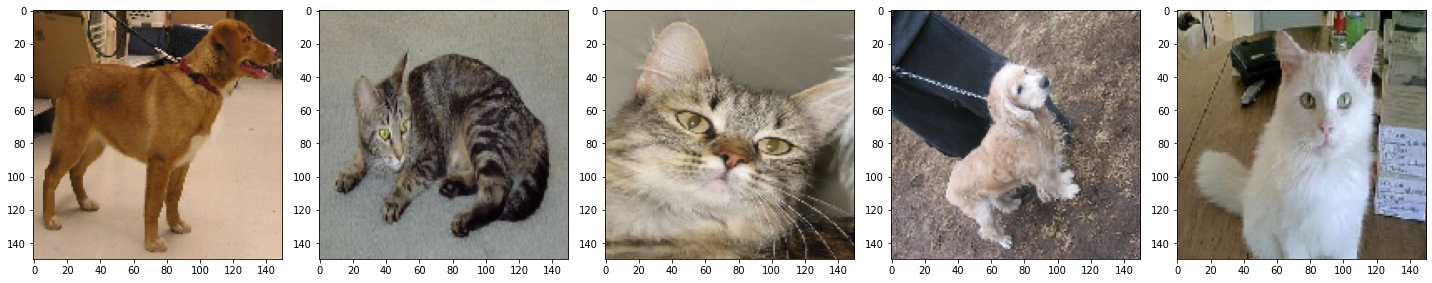

In [ ]:
plotImage(sample_training_images[:10])

In [ ]:
model=tf.keras.models.Sequential([
                     tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                     tf.keras.layers.MaxPool2D(2,2),

                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                     tf.keras.layers.MaxPooling2D(2,2),

                     tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                     tf.keras.layers.MaxPooling2D(2,2),

                     tf.keras.layers.Flatten(),
                     tf.keras.layers.Dense(512,activation='relu'),
                     tf.keras.layers.Dense(2,activation='softmax')
                  ]) 


                        

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0

In [ ]:
epochs=10
history=model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(batch_size))),
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=int(np.ceil(total_val/float(batch_size)))
)

Epoch 1/10
20/20 [==============================] - 8s 422ms/step - loss: 0.9143 - accuracy: 0.5525 - val_loss: 0.6612 - val_accuracy: 0.6420
Epoch 2/10
20/20 [==============================] - 8s 414ms/step - loss: 0.6419 - accuracy: 0.6395 - val_loss: 0.6538 - val_accuracy: 0.5760
Epoch 3/10
20/20 [==============================] - 8s 405ms/step - loss: 0.5973 - accuracy: 0.6845 - val_loss: 0.6217 - val_accuracy: 0.6570
Epoch 4/10
20/20 [==============================] - 8s 409ms/step - loss: 0.5399 - accuracy: 0.7305 - val_loss: 0.5608 - val_accuracy: 0.7180
Epoch 5/10
20/20 [==============================] - 8s 407ms/step - loss: 0.4841 - accuracy: 0.7685 - val_loss: 0.6056 - val_accuracy: 0.6680
Epoch 6/10
20/20 [==============================] - 8s 405ms/step - loss: 0.4169 - accuracy: 0.8085 - val_loss: 0.5492 - val_accuracy: 0.7340
Epoch 7/10
20/20 [==============================] - 8s 401ms/step - loss: 0.3479 - accuracy: 0.8510 - val_loss: 0.5650 - val_accuracy: 0.7510
Epoch 

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

